In [1]:
# Student - Tim Tieng
# Program - MS in Applied Data Science
# Course - IST-718 Big Data Analytics
# Instructor - Professor Jill Lando

#Attestation
# I used the course materials and the following resources to complete this assignment:
# 1. Pandas Documentation on numpy.nan https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
# 2. I promoted ChatGPT to assist me with the process to replace null values for an entire dataframe "What is the python code to replace null values for an entire dataframe that has over 344 attributes and over 10,000 null values in some columns?"
# 3. How to display all rows when printing a DF versus portions of the DF- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
# 4. Long Vs Wide Data -https://www.statology.org/long-vs-wide-data/
# 5. https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
# 6. I asked questions about forecasting approaches to my project group partners, Timothy F and Hans B

In [3]:
# Import Packages
# %matplotlib qt
import pandas as pd  # data frame operations
from pandas.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Used for Time Series Analysis
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from statsmodels.tsa.stattools import acf, pacf # used for TSA
from statsmodels.tsa.arima.model import ARIMA # used to conduct AutoRegressive Integrated Moving Average Modeling
from statsmodels.tsa.stattools import adfuller # used to conduct ADF test for stationary/non-stationary data for TSA
#from sklearn.tree import DecisionTreeRegressor  # machine learning tree
#from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.model_selection import train_test_split, cross_val_score # Used of ML tasks
from sklearn.metrics import mean_squared_error # Used to calculate MSE, essential in regression modeling
import matplotlib.pyplot as plt # Visualizations
from matplotlib.ticker import FuncFormatter # Formatting Visualizations
import matplotlib.dates as mdates # Visualization package to work with date and time data
import seaborn as sns # Another Visualization package; formatting/aesthetics
import statsmodels.api as sm # Statistical Modeling
from datetime import datetime

In [4]:
# Obtain the Data - Read in provided Zillow Data
zillowURL = "http://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_month.csv"
zillowDF = pd.read_csv(zillowURL)

In [5]:
# Scrub the Data - Inspect
# Print Datatypes in the DF
print(zillowDF.dtypes)

# Initial Observations:
# 1. 29123 Rows, with 344 Attributes
# 2. NaN/Null Values Present; replacement required
# 3. Mix of datatypes: String/Objects, Ints, Floats
# 4. Last Attributes are DTG that span from 02/29/1996 to 12/31/2023
# 5. Values in the DTG columns seems to be the value of the Home at that date -> Timeseries analysis

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
Length: 345, dtype: object


In [6]:
# Inspect
zillowDF

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-02-29,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,174239.355040,...,499843.893006,507166.587781,513415.523853,515952.642211,515830.934282,514233.091471,510493.094991,508922.643359,508243.286297,509326.009535
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,142300.347538,...,644442.587877,658917.003110,670798.830094,680128.845030,688938.397910,697062.869591,705328.943345,710022.779086,706979.154160,700758.814529
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,101723.279291,...,278220.041748,280126.452559,282649.940882,283391.781152,283550.725766,282879.272136,280759.375653,279694.127188,278840.664275,279231.148078
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,200238.096434,...,861107.017608,861893.376717,865471.009328,867162.458150,864603.277579,860348.620595,863204.993361,863971.604411,863514.452820,864159.839828
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,96058.417363,...,277299.730943,279923.526989,282658.267054,283267.163775,283437.451849,282516.423865,280455.272911,278691.080901,277561.175855,277624.815931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29116,68435,39992,25061,zip,WV,WV,Cabin Creek,"Charleston, WV",Kanawha County,NaN,...,76643.641382,78354.409929,79666.268952,80194.663981,81024.000549,81290.747461,81064.974023,80731.447696,79362.578907,78640.994404
29117,67368,39992,22722,zip,VA,VA,Haywood,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Madison County,147455.174637,...,354810.701320,360976.555483,366862.539617,371337.153440,372577.631875,370966.698529,369018.187049,367983.074875,364889.887372,361000.476556
29118,75621,39992,40310,zip,KY,KY,Burgin,NaN,Mercer County,NaN,...,127207.534601,130032.869104,131360.630089,133821.647830,133837.267024,133093.507378,132045.107629,129995.654818,128221.143429,125484.240855
29119,94210,39992,83547,zip,ID,ID,Pollock,NaN,Idaho County,NaN,...,410669.843336,420139.511295,430243.542458,433774.588083,435271.912720,436732.896318,434163.147262,431956.126323,424466.357065,423813.210498


In [7]:
# Scrub Continue - Data Cleaning
# Get how many null values there are and in what columns
zillowDF.isna().sum()

# I visually see City attribute has 'NaN'and Feb 1996 column has NaN
# cityNullValueCount = zillowDF['City'].isna().sum()
# feb1996NullValueCount = zillowDF['1996-02-29'].isna().sum()

# Get how many null values there are and in what columns after the change
pd.set_option('display.max_rows', 350) # this is for output formatting to set how may obs. are shown
zillowDF.isna().sum()

# There are alot of null values below

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName         0
State             0
City           1289
Metro          6959
CountyName        0
1996-02-29    14779
1996-03-31    14698
1996-04-30    14684
1996-05-31    14667
1996-06-30    14602
1996-07-31    14583
1996-08-31    14568
1996-09-30    14541
1996-10-31    14518
1996-11-30    14505
1996-12-31    14486
1997-01-31    14463
1997-02-28    14305
1997-03-31    14276
1997-04-30    14234
1997-05-31    14193
1997-06-30    14162
1997-07-31    14153
1997-08-31    14142
1997-09-30    14107
1997-10-31    14050
1997-11-30    14020
1997-12-31    13989
1998-01-31    13971
1998-02-28    13925
1998-03-31    13900
1998-04-30    13860
1998-05-31    13720
1998-06-30    13653
1998-07-31    13584
1998-08-31    13579
1998-09-30    13492
1998-10-31    13447
1998-11-30    13415
1998-12-31    13407
1999-01-31    13419
1999-02-28    13318
1999-03-31    13296
1999-04-30    13243
1999-05-31    13219
1999-06-30    13164


In [8]:
# Data Cleaning Continued
# Replace NaN in 'City' column with 'Unknown' (String Datatypes)
zillowDF['City'] = zillowDF['City'].fillna('Unknown')
zillowDF['Metro'] = zillowDF['Metro'].fillna('Unknown')

# Replace NaN values with 0.0 in the entire DataFrame
zillowDF.fillna(0.0, inplace=True)

# Confirm changes stuck
print(zillowDF.isna().sum())

# Get how many null values there are and in what columns after the change
pd.set_option('display.max_rows', 350)
zillowDF.isna().sum()
pd.reset_option('display.max_rows')

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
City          0
Metro         0
CountyName    0
1996-02-29    0
1996-03-31    0
1996-04-30    0
1996-05-31    0
1996-06-30    0
1996-07-31    0
1996-08-31    0
1996-09-30    0
1996-10-31    0
1996-11-30    0
1996-12-31    0
1997-01-31    0
1997-02-28    0
1997-03-31    0
1997-04-30    0
1997-05-31    0
1997-06-30    0
1997-07-31    0
1997-08-31    0
1997-09-30    0
1997-10-31    0
1997-11-30    0
1997-12-31    0
1998-01-31    0
1998-02-28    0
1998-03-31    0
1998-04-30    0
1998-05-31    0
1998-06-30    0
1998-07-31    0
1998-08-31    0
1998-09-30    0
1998-10-31    0
1998-11-30    0
1998-12-31    0
1999-01-31    0
1999-02-28    0
1999-03-31    0
1999-04-30    0
1999-05-31    0
1999-06-30    0
1999-07-31    0
1999-08-31    0
1999-09-30    0
1999-10-31    0
1999-11-30    0
1999-12-31    0
2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
2000-05-31    0
2000-06-30    0
2000-07-

In [9]:
# Explore - Summary Statistics
zillowDF.describe()

,RegionID,SizeRank,RegionName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
count,29121.000000,29121.000000,29121.000000,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,...,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04,2.912100e+04
mean,80619.823804,15141.453041,48910.932901,6.063544e+04,6.116433e+04,6.149447e+04,6.199530e+04,6.295750e+04,6.362624e+04,6.400132e+04,...,3.526878e+05,3.576564e+05,3.622081e+05,3.650905e+05,3.652513e+05,3.648960e+05,3.635821e+05,3.619644e+05,3.591508e+05,3.566831e+05
std,27268.356872,9161.192577,27229.359689,8.870851e+04,9.080962e+04,9.140257e+04,9.201900e+04,9.584747e+04,9.675078e+04,9.746714e+04,...,3.761823e+05,3.805879e+05,3.850609e+05,3.859690e+05,3.833607e+05,3.822259e+05,3.821137e+05,3.800970e+05,3.779548e+05,3.767496e+05
min,58196.000000,1.000000,1001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.610686e+04,2.632608e+04,2.524115e+04,2.542057e+04,2.490833e+04,2.540232e+04,2.531843e+04,2.689148e+04,2.681669e+04,2.610764e+04
25%,69033.000000,7363.000000,26419.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.735055e+05,1.763351e+05,1.782952e+05,1.801892e+05,1.803169e+05,1.799291e+05,1.786975e+05,1.779437e+05,1.757093e+05,1.735831e+05
50%,79345.000000,14778.000000,48642.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.581945e+05,2.619319e+05,2.657213e+05,2.682935e+05,2.688615e+05,2.686726e+05,2.673699e+05,2.661627e+05,2.633379e+05,2.612607e+05
75%,88784.000000,22400.000000,70601.000000,9.988915e+04,1.005786e+05,1.009817e+05,1.018259e+05,1.031545e+05,1.040532e+05,1.048967e+05,...,4.044130e+05,4.097031e+05,4.149258e+05,4.182250e+05,4.188981e+05,4.184346e+05,4.168340e+05,4.150008e+05,4.120003e+05,4.100086e+05
max,808739.000000,39992.000000,99929.000000,2.565313e+06,2.791351e+06,2.954360e+06,3.017622e+06,3.976622e+06,3.732419e+06,3.736028e+06,...,1.471871e+07,1.478555e+07,1.476448e+07,1.453319e+07,1.418660e+07,1.393922e+07,1.396604e+07,1.394311e+07,1.390918e+07,1.394842e+07


In [10]:
# Debug - Metro analysis is no longer returning visualizations.
pd.set_option('display.max_rows', 350)
print(zillowDF['Metro'].unique()) # The output changed, I need to reformat

['Houston-The Woodlands-Sugar Land, TX'
 'New York-Newark-Jersey City, NY-NJ-PA' 'El Paso, TX'
 'Austin-Round Rock-Georgetown, TX' 'Los Angeles-Long Beach-Anaheim, CA'
 'Chicago-Naperville-Elgin, IL-IN-WI'
 'Nashville-Davidson--Murfreesboro--Franklin, TN'
 'Atlanta-Sandy Springs-Alpharetta, GA'
 'Riverside-San Bernardino-Ontario, CA'
 'San Francisco-Oakland-Berkeley, CA' 'Dallas-Fort Worth-Arlington, TX'
 'Bakersfield, CA' 'San Antonio-New Braunfels, TX'
 'Brownsville-Harlingen, TX' 'San Diego-Chula Vista-Carlsbad, CA'
 'McAllen-Edinburg-Mission, TX' 'Oxnard-Thousand Oaks-Ventura, CA'
 'Santa Cruz-Watsonville, CA' 'Fresno, CA' 'Kennewick-Richland, WA'
 'Sacramento-Roseville-Folsom, CA'
 'Washington-Arlington-Alexandria, DC-VA-MD-WV' 'Raleigh-Cary, NC'
 'Oklahoma City, OK' 'Urban Honolulu, HI' 'Clarksville, TN-KY'
 'Phoenix-Mesa-Chandler, AZ' 'San Jose-Sunnyvale-Santa Clara, CA'
 'Visalia, CA' 'Kansas City, MO-KS' 'Charlotte-Concord-Gastonia, NC-SC'
 'Vallejo, CA' 'Orlando-Kissimmee-San

In [11]:
# Initial EDA - Arkansas Metro Area analysis
#print(zillowDF['Metro'].unique())

# Filter for the the Four metro area, Create an array to hold the names of metros of interest
arkansas_metro_areas = ['Hot Springs, AR', 'Little Rock-North Little Rock-Conway, AR', 'Fayetteville-Springdale-Rogers, AR', 'Searcy, AR']
#arkansas_metro_areas
# Create new df that has information for the 4 metro areas above. If the "metro" is in the array, append it to the new DF.
filtered_df = zillowDF[zillowDF['Metro'].isin(arkansas_metro_areas)]
filtered_df

# Specify the date columns for the question
date_cols = [col for col in filtered_df.columns if '-' in col]

# Filter for columns from 1997 onwards
date_cols = [col for col in date_cols if pd.to_datetime(col).year >= 1997]
filtered_df = filtered_df[['City', 'Metro'] + date_cols]

# Calculate average home values for each metro area
average_values_by_metro = filtered_df.groupby('Metro')[date_cols].mean()

# Print the average_values DataFrame
average_values_by_metro

,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31
Metro,,,,,,,,,,,,,,,,,,,,,
"Fayetteville-Springdale-Rogers, AR",91917.661349,91804.515650,92618.938128,93800.985273,94427.048068,94224.763736,94105.845395,94104.771083,94539.169559,95231.502830,...,321581.214005,326379.692959,330655.825916,333830.518444,334844.534993,336131.508984,335873.347132,334970.584797,332812.076722,331555.779494
"Hot Springs, AR",67292.950302,68426.553900,68051.776619,68055.010805,68564.641273,68695.640244,69430.457631,69694.266586,69312.328327,67981.490619,...,231332.515323,235916.661032,239101.394175,241293.947242,241009.470308,240848.528891,239794.434860,238576.986570,236633.589917,233707.996605
"Little Rock-North Little Rock-Conway, AR",89384.600474,89351.449250,89596.199603,90114.670370,90873.588219,91615.592005,92299.516103,92746.979009,93024.437852,93083.557675,...,221905.224465,225359.203844,226909.492827,227229.612274,226807.231159,226653.622394,226357.639099,225925.394307,224684.883227,223289.442175
"Searcy, AR",75188.978470,75157.952544,75664.939683,75806.886763,76584.978509,77005.166980,77543.158696,78428.933329,78470.080855,78212.614817,...,182589.478045,185518.472743,187660.457678,187507.362427,184622.209474,184042.426339,182978.195389,182683.932148,181824.660056,179445.498141


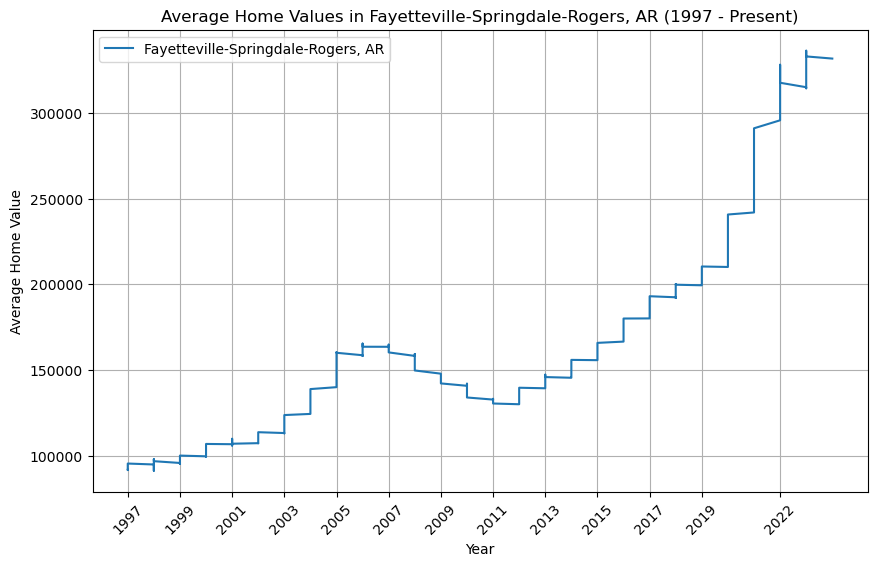

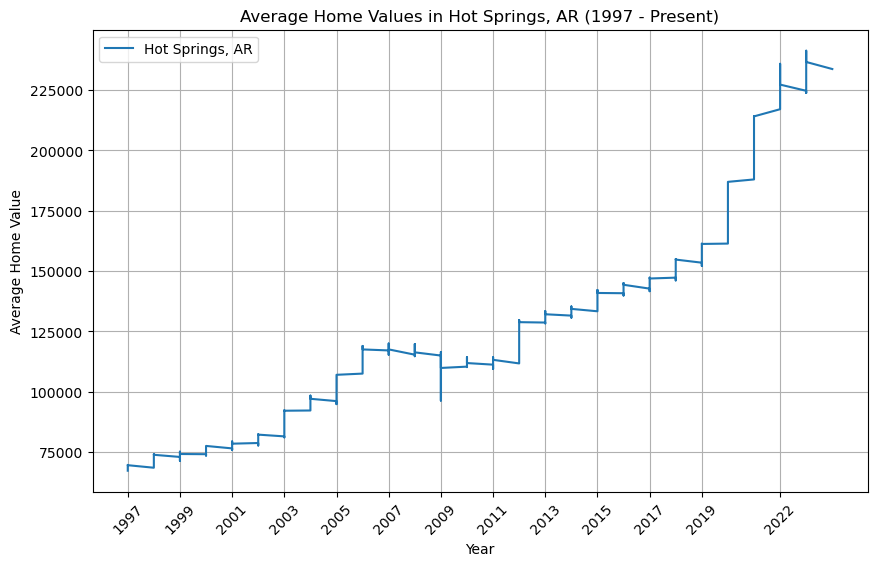

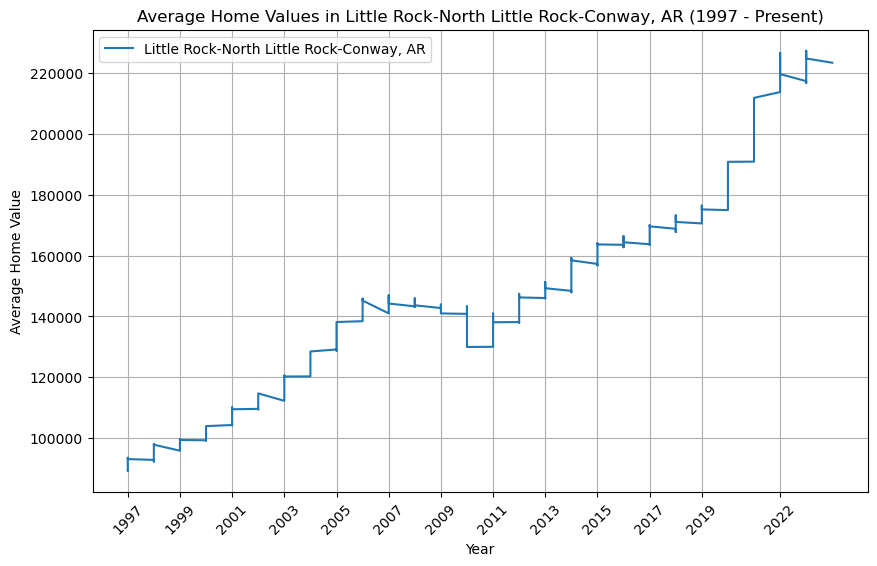

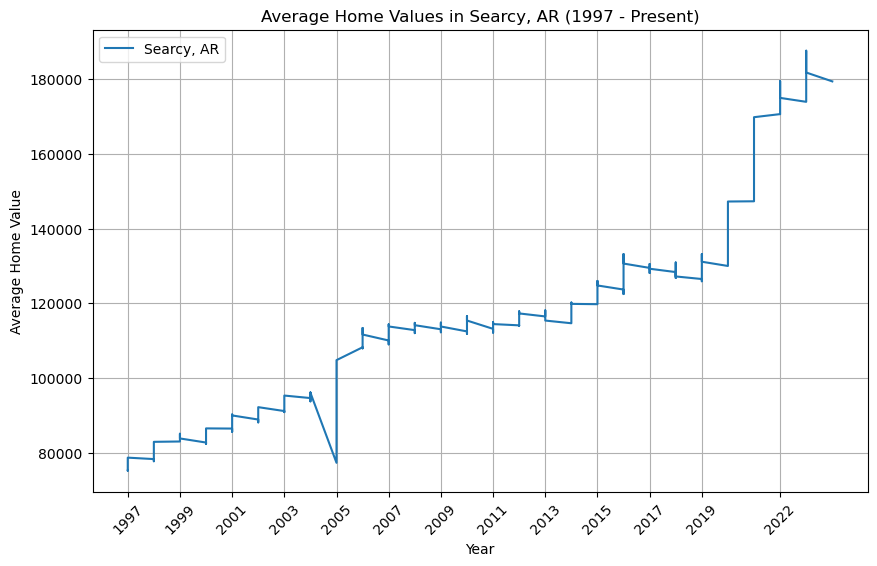

In [12]:
# Visualize - Create four separate line graphs for each of the metros

years = pd.to_datetime(average_values_by_metro.columns).year

# Create a separate plot for each metro area using a function 
# Iterate through the average_values object to get the average value by metro over the years
for metro in average_values_by_metro.index:
    plt.figure(figsize=(10, 6))  # Width, height of the plot
    plt.plot(years, average_values_by_metro.loc[metro], label=metro) #plt.plot(x-axis param, y-axis param, label= variable of interest)
    
    # Formatting each plot
    plt.title(f'Average Home Values in {metro} (1997 - Present)')
    plt.xlabel('Year')
    plt.ylabel('Average Home Value')
    plt.xticks(years[::25], rotation=45)  # Change the incrementor value to affect the readibility of the graph
    plt.grid(True)
    plt.legend()
    plt.show()

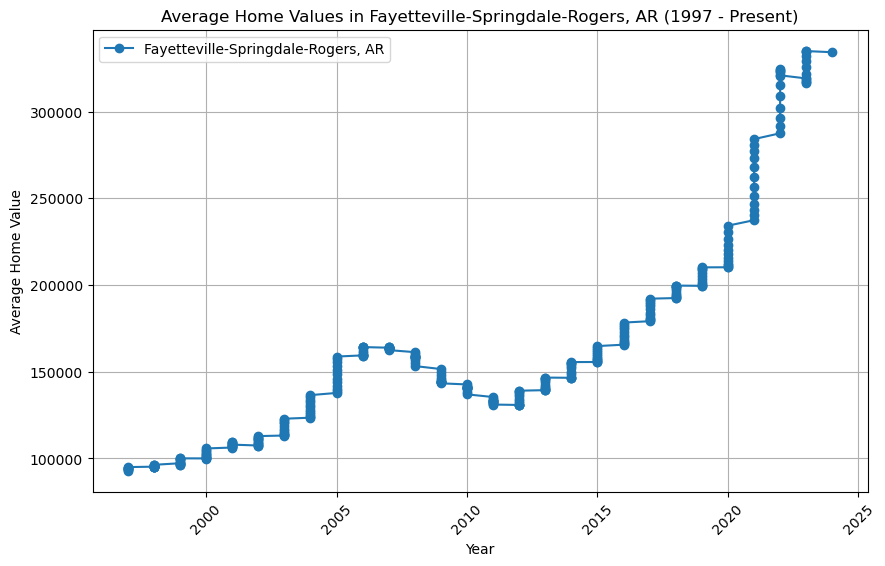

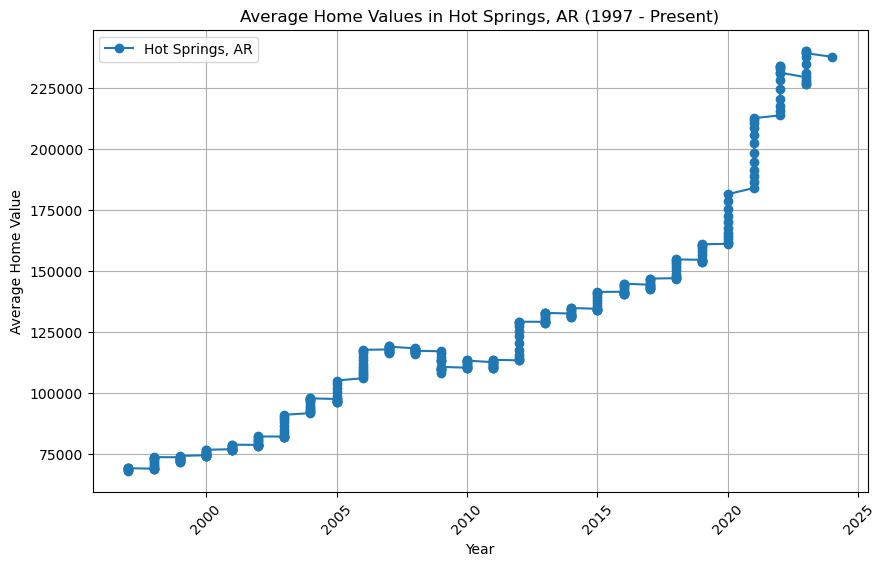

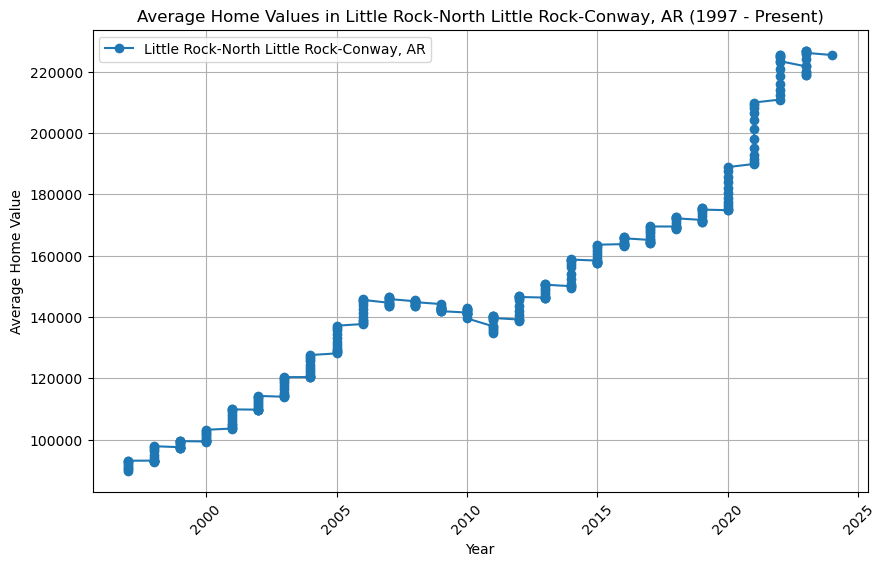

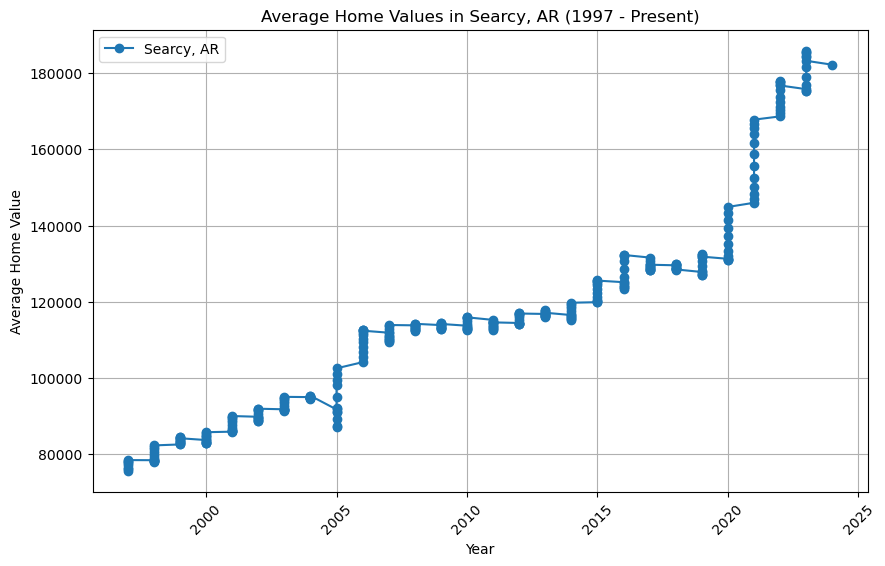

In [13]:
# The output is very jagged, let me include moving average to see if the visualization is smoother
years2 = pd.to_datetime(average_values_by_metro.columns).year
window_size = 5  # Moving average window size

# Create a separate plot for each metro area using a function
# Iterate through the average_values object to get the average value by metro over the years
for metro in average_values_by_metro.index:
    plt.figure(figsize=(10, 6))  # Width, height of the plot
    
    # Calculate the moving average for smoother line
    smoothed_values = average_values_by_metro.loc[metro].rolling(window=window_size).mean()
    
    plt.plot(years2, smoothed_values, label=metro, marker='o')  # Adding a marker for each data point
    
    # Formatting each plot
    plt.title(f'Average Home Values in {metro} (1997 - Present)')
    plt.xlabel('Year')
    plt.ylabel('Average Home Value')
    plt.xticks(rotation=45)  # Ensure x-axis ticks correspond to the data points
    plt.grid(True)
    plt.legend()
    plt.show()

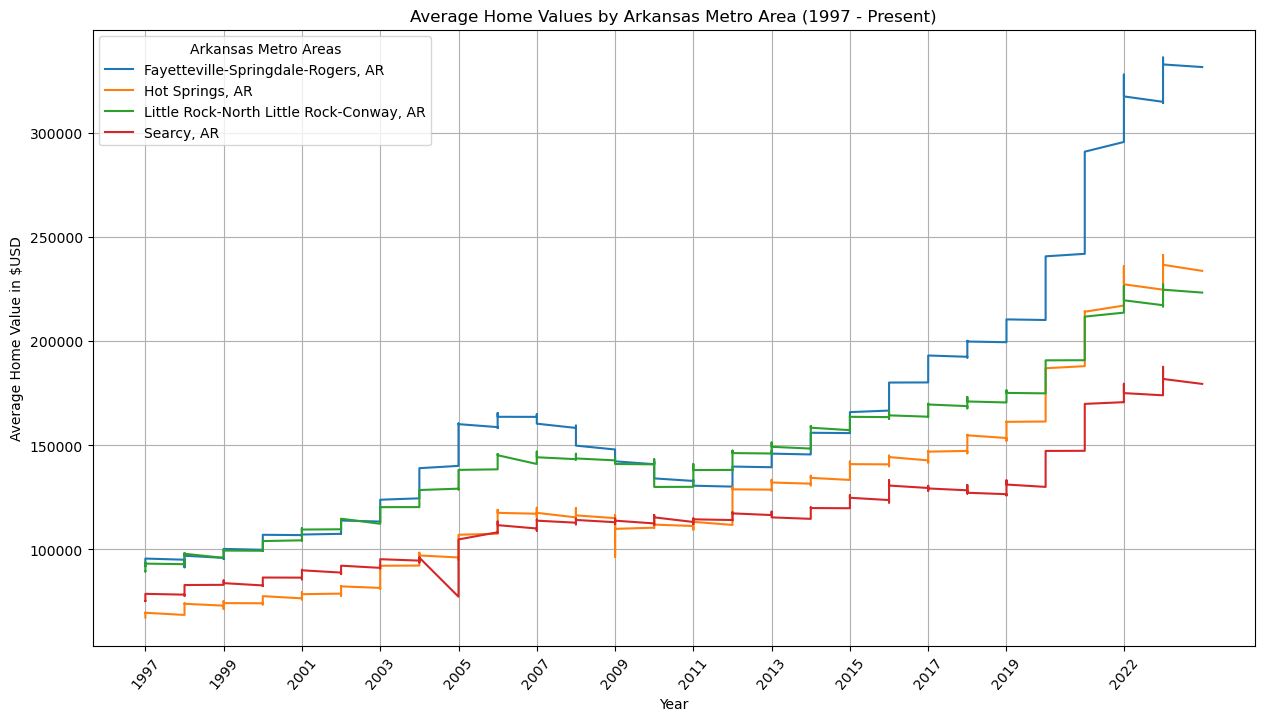

In [14]:
# Visualize all four average values for the metros on one graph

# Prepare the plot
plt.figure(figsize=(15, 8))

# Extract years from the column names for x-axis labels
# Convert to DTG
years = pd.to_datetime(average_values_by_metro.columns).year

# Plot each metro area - 
# Iterate through the average_values object, and plot the corresponding value at a given year by metro
for metro in average_values_by_metro.index:
    plt.plot(years, average_values_by_metro.loc[metro], label=metro)

# Formatting the plot
plt.title('Average Home Values by Arkansas Metro Area (1997 - Present)')
plt.xlabel('Year')
plt.ylabel('Average Home Value in $USD')
plt.legend(title='Arkansas Metro Areas')
plt.grid(True)

# Set x-axis ticks to be every year (optional: adjust as needed)
plt.xticks(years[::25], rotation=50)  # Adjusting the value of the incrementor to improve the visualization 

# Show the plot
plt.show()

In [15]:
# Study Question - Develop a model to predict/forecast the average median household value by zip code
# Contraints - Use data from 1997-2017 as training data

# Modeling Part 1
# Transform Datafram from wide to long format -> one column for dayte and regionName and median house value
# Focus on NY first to get macro level then Syracuse, NY

# Get New York Data - Subset
ny_data = zillowDF[zillowDF['State'] == 'NY']

# Select and print unique combinations of RegionName, City, and State
unique_ny_locations = ny_data[['RegionName', 'City', 'StateName']].drop_duplicates()
# pd.set_option('display.max_rows', 1700)
print(unique_ny_locations)

# Syracuse, NY has several Zip codes - We may need to analyze each one, or aggregate the data to get an estimate

# Reset Display options
#pd.reset_option('display.max_rows')

       RegionName                   City StateName
3           11368               New York        NY
6           11385               New York        NY
8           11208               New York        NY
15          11236               New York        NY
16          10467               New York        NY
...           ...                    ...       ...
29071       13651       Henderson Harbor        NY
29084       12792                  Yulan        NY
29094       12787  White Sulphur Springs        NY
29099       13020         Apulia Station        NY
29112       14415                Bellona        NY

[1672 rows x 3 columns]


In [17]:
# Modeling - Reshape the current format from wide to long to get Median data

ny_data_long = pd.melt(ny_data, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], 
                       var_name='Date', value_name='MedianHousingValue')

# Convert the 'Date' column to datetime format
ny_data_long['Date'] = pd.to_datetime(ny_data_long['Date'])

# Aggregate the median housing values by date
ny_data_aggregated = ny_data_long.groupby('Date')['MedianHousingValue'].median().reset_index()

# Display the first few rows of the aggregated data
ny_data_aggregated.head()

,Date,MedianHousingValue
0,1996-02-29,77645.958938
1,1996-03-31,77500.761379
2,1996-04-30,77584.335046
3,1996-05-31,77635.610371
4,1996-06-30,78511.721232


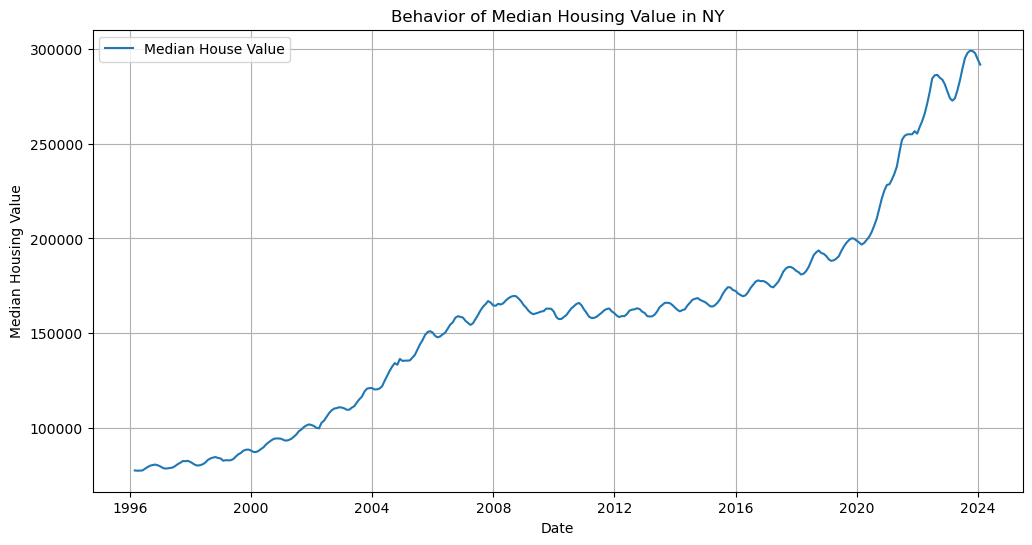

In [18]:
# Create a line plot of the Median Housing Value for all of NY first
plt.figure(figsize=(12, 6))
plt.plot(ny_data_aggregated['Date'], ny_data_aggregated['MedianHousingValue'], label='Median House Value')
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Behavior of Median Housing Value in NY')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Test to see if data is stationary. Stationary is needed for TSAnalysis. 
# Stationary = the values dont change over time (mean, median, variance etc.)
# Perform Augmented Dickey-Fuller test 
result = adfuller(ny_data_aggregated['MedianHousingValue'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret the results
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

ADF Statistic: 0.574970
p-value: 0.986982
Series is not stationary


In [20]:
# Attempt 2 to achieve stationary data by differencing
# Create new column in df with 'MedianHousingValue_diff' as the name, and the value is the difference between 
# Current and previous value
ny_data_aggregated['MedianHousingValue_diff'] = ny_data_aggregated['MedianHousingValue'].diff()

# Drop the first row because you wont be able to get a differnce value 
ny_data_aggregated = ny_data_aggregated.dropna()

ny_data_aggregated


,Date,MedianHousingValue,MedianHousingValue_diff
1,1996-03-31,77500.761379,-145.197559
2,1996-04-30,77584.335046,83.573667
3,1996-05-31,77635.610371,51.275326
4,1996-06-30,78511.721232,876.110861
5,1996-07-31,79410.491566,898.770334
6,1996-08-31,80134.580201,724.088634
7,1996-09-30,80494.113448,359.533248
8,1996-10-31,80735.679870,241.566422
9,1996-11-30,80399.408635,-336.271235
10,1996-12-31,79824.160858,-575.247777


In [21]:
# Attempt 2 - Retest ADF to see if changes made the data stationary - use code block above
result_diff = adfuller(ny_data_aggregated['MedianHousingValue_diff'])

# Output the results
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

# Interpret the results
if result_diff[1] > 0.05:
    print("Differenced series is not stationary")
else:
    print("Differenced series is stationary")

ADF Statistic: -2.495124
p-value: 0.116665
Differenced series is not stationary


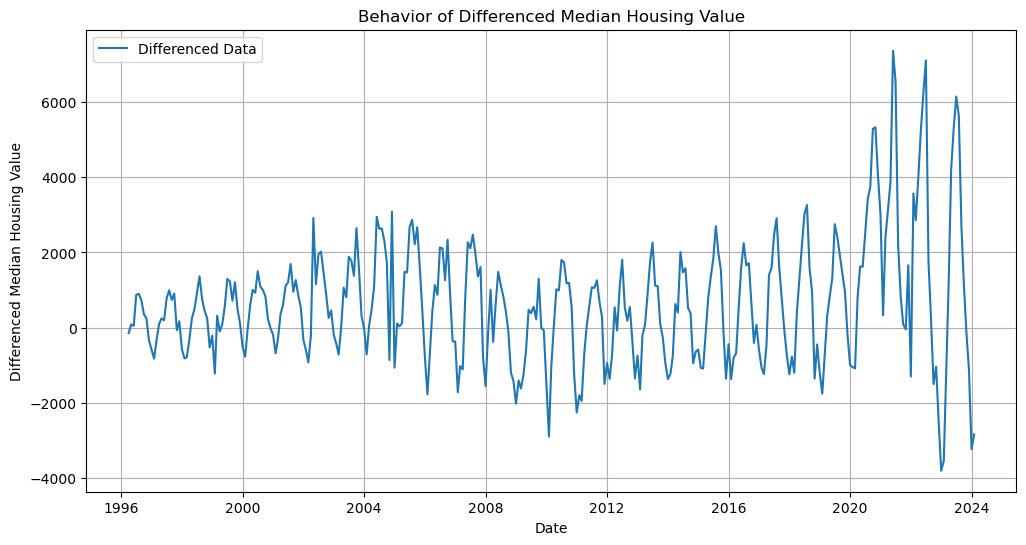

In [22]:
# Create a line plot of the differenced data
plt.figure(figsize=(12, 6))
plt.plot(ny_data_aggregated['Date'], ny_data_aggregated['MedianHousingValue_diff'], label='Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Median Housing Value')
plt.title('Behavior of Differenced Median Housing Value')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Trying to adjust for lag since the difference did not make the data stationary
series = ny_data_aggregated['MedianHousingValue_diff']

# Try different lag lengths - start with 1 and increase if necessary
max_lag = 1
result_diff = adfuller(series, maxlag=max_lag)

# Output the results
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

# Interpret the results
if result_diff[1] > 0.05:
    print("Differenced series with lag {} is not stationary".format(max_lag))
else:
    print("Differenced series with lag {} is stationary".format(max_lag))

ADF Statistic: -7.071062
p-value: 0.000000
Differenced series with lag 1 is stationary


/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_5710/830265754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_aggregated['Date'] = pd.to_datetime(ny_data_aggregated['Date'], format='%Y')  # Adjust the format as per your data


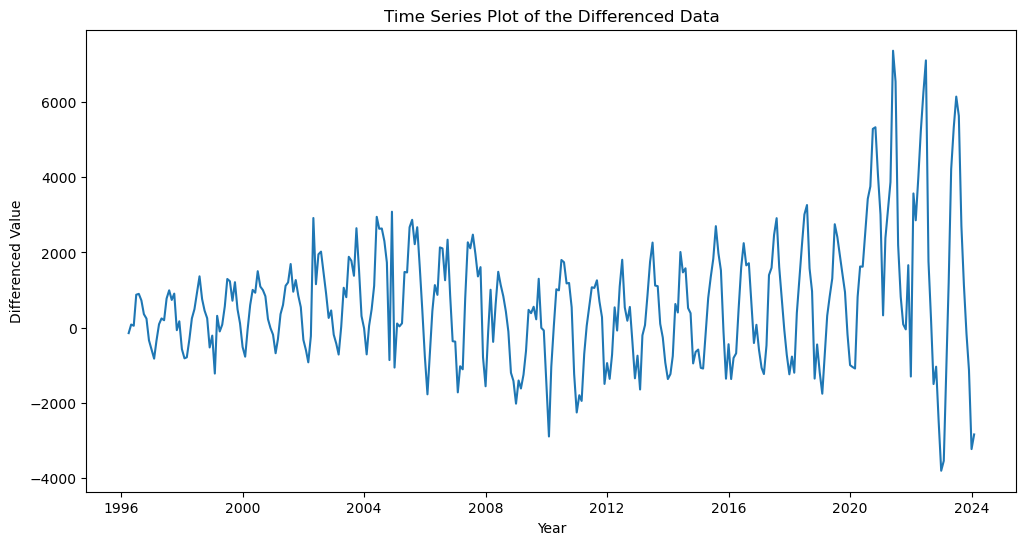

/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


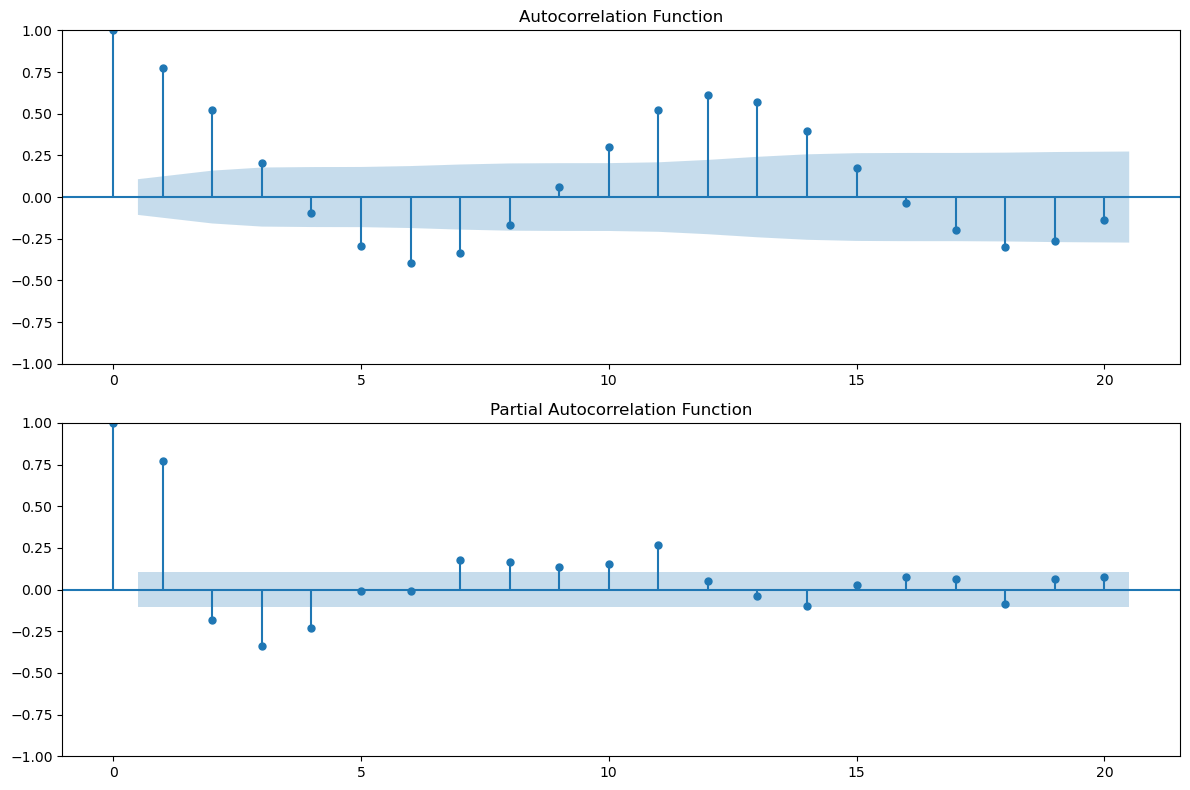

In [25]:
#Visualize the now stationary data
# Convert the 'Year' column to datetime and set as index
ny_data_aggregated['Date'] = pd.to_datetime(ny_data_aggregated['Date'], format='%Y')  # Adjust the format as per your data
ny_data_aggregated.set_index('Date', inplace=True)

series = ny_data_aggregated['MedianHousingValue_diff']

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('Time Series Plot of the Differenced Data')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(series, ax=ax[0], lags=20)  # Adjust lags as needed
ax[0].set_title('Autocorrelation Function')

plot_pacf(series, ax=ax[1], lags=20)  # Adjust lags as needed
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     MedianHousingValue   No. Observations:                  335
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2937.280
Date:                Sat, 17 Feb 2024   AIC                           5880.560
Time:                        10:51:09   BIC                           5891.993
Sample:                    03-31-1996   HQIC                          5885.119
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5196      0.056      9.320      0.000       0.410       0.629
ma.L1         -0.3431      0.059     -5.797      0.000      -0.459      -0.227
sigma2      2.326e+06    1.4e-08   1.66e+14      0.0

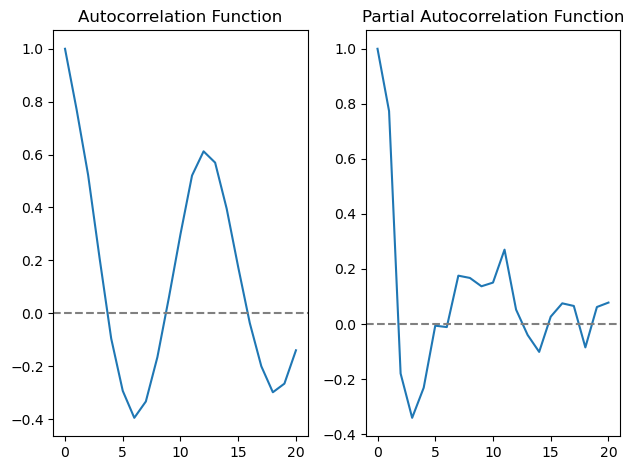

In [26]:
# AutoRegression Integrated Moving Average (ARIMA) Model Fitting ARIMA(p=1, d,=1, q =1)

# ACF and PACF plots
lag_acf = acf(ny_data_aggregated['MedianHousingValue_diff'], nlags=20)
lag_pacf = pacf(ny_data_aggregated['MedianHousingValue_diff'], nlags=20)

# Plot Autocorrelation Function: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot Partial ACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Fitting the ARIMA model
# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(ny_data_aggregated['MedianHousingValue'], order=(1, 1, 1)) # Attempt 1 
results_ARIMA = model.fit()

# Print model summary
print(results_ARIMA.summary())

In [27]:
# Observations:
# I have a very low Log-Likliehood Value when ideally, we want a higher number (close to zero)
#. AIC Value is very large , 6077.742. Ideally we have a small value. This suggests that this is a poor fitting model
# Ljung-Box Value - 149.08 suggests that autocorrelation is still present. This confirms that the model is underperforming

/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-package

                                  SARIMAX Results                                  
Dep. Variable:     MedianHousingValue_diff   No. Observations:                  335
Model:                     ARIMA(5, 7, 11)   Log Likelihood               -2956.065
Date:                     Sat, 17 Feb 2024   AIC                           5946.130
Time:                             11:02:32   BIC                           6010.611
Sample:                         03-31-1996   HQIC                          5971.856
                              - 01-31-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -4.3609      0.596     -7.315      0.000      -5.529      -3.192
ar.L2         -8.1646      2.123     -3.846      0.000     -12.326      -4.003
ar.L3       

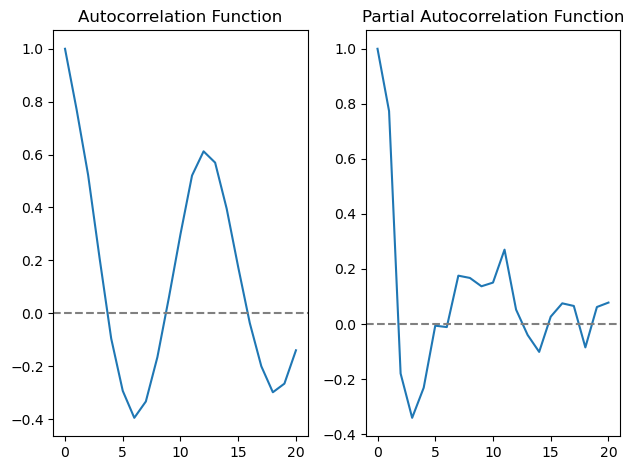

In [28]:
# ARIMA Parameter Tuning - ARIMA(p=5, d,=7, q =11)

# ACF and PACF plots
lag_acf = acf(ny_data_aggregated['MedianHousingValue_diff'], nlags=20)
lag_pacf = pacf(ny_data_aggregated['MedianHousingValue_diff'], nlags=20)

# Plot Autocorrelation Function: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot Partial ACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Fitting the ARIMA model
# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(ny_data_aggregated['MedianHousingValue_diff'], order=(5, 7, 11)) # Attempt 2 
results_ARIMA = model.fit()

# Print model summary
print(results_ARIMA.summary())

/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_5710/687455908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_aggregated['log_value'] = np.log(ny_data_aggregated['MedianHousingValue']) # Create new column in DF to hold log data
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/timtieng/anaconda3/anaconda3/lib/python3.10

                               SARIMAX Results                                
Dep. Variable:              log_value   No. Observations:                  335
Model:                 ARIMA(6, 2, 2)   Log Likelihood                1273.032
Date:                Sat, 17 Feb 2024   AIC                          -2528.065
Time:                        11:04:58   BIC                          -2493.791
Sample:                    03-31-1996   HQIC                         -2514.398
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1611      0.280     -0.575      0.566      -0.710       0.388
ar.L2          0.3835      0.151      2.546      0.011       0.088       0.679
ar.L3          0.1065      0.087      1.218      0.2

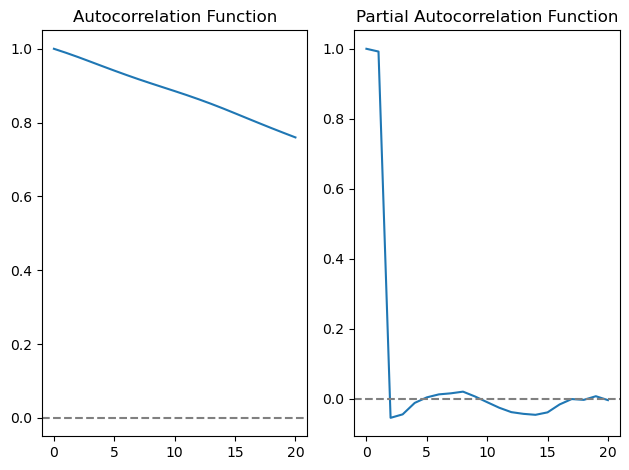

In [29]:
# Model tuning -  Apply log transformation 
ny_data_aggregated['log_value'] = np.log(ny_data_aggregated['MedianHousingValue']) # Create new column in DF to hold log data

# Fit an ARIMA model on the transformed data
model = ARIMA(ny_data_aggregated['log_value'], order=(2, 2, 2))
results = model.fit()

# Get forecasts and apply inverse transformation
log_forecast = results.get_forecast(steps=10)
forecast = np.exp(log_forecast.predicted_mean)

# ACF and PACF plots
lag_acf = acf(ny_data_aggregated['log_value'], nlags=20)
lag_pacf = pacf(ny_data_aggregated['log_value'], nlags=20)

# Plot Autocorrelation Function: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot Partial ACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Fitting the ARIMA model
# Example: ARIMA with p=1, d=1, q=1
model = ARIMA(ny_data_aggregated['log_value'], order=(6, 2, 2))
results_ARIMA = model.fit()

# Print model summary
print(results_ARIMA.summary())


In [27]:
# Same process for lag_value

series2 = ny_data_aggregated['log_value']

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(series2)
plt.title('Time Series Plot of the Log Data')
plt.xlabel('Year')
plt.ylabel('Log Value')
plt.show()

# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(series2, ax=ax[0], lags=20)  # Adjust lags as needed
ax[0].set_title('Autocorrelation Function')

plot_pacf(series2, ax=ax[1], lags=20)  # Adjust lags as needed
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

/Users/timtieng/anaconda3/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


In [28]:
# Filter data for Syracuse
syracuse_data = ny_data_long[ny_data_long['City'] == 'Syracuse']

# Convert the 'Date' column to datetime format
syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])

# Aggregate the median housing values by date for Syracuse
syracuse_aggregated = syracuse_data.groupby('Date')['MedianHousingValue'].median().reset_index()

/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_2127/3422867540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])


In [41]:
syracuse_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,MedianHousingValue
236,63017,4147,13210,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,1996-02-29,67460.089559
290,63015,5471,13208,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,1996-02-29,50617.923251
327,63011,6111,13204,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,1996-02-29,52835.052423
367,63010,6978,13203,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,1996-02-29,74235.630629
368,63012,6988,13205,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,1996-02-29,55509.299181
...,...,...,...,...,...,...,...,...,...,...,...
560568,63016,8616,13209,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,2024-01-31,194106.121352
560664,63027,10394,13224,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,2024-01-31,229486.941970
560701,63020,10897,13214,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,2024-01-31,246822.532950
560720,63009,11287,13202,zip,NY,NY,Syracuse,"Syracuse, NY",Onondaga County,2024-01-31,182667.863163


In [68]:
syracuse_data.dtypes

RegionID                       int64
SizeRank                       int64
RegionName                     int64
RegionType                    object
StateName                     object
State                         object
City                          object
Metro                         object
CountyName                    object
Date                  datetime64[ns]
MedianHousingValue           float64
dtype: object

In [30]:
syracuse_aggregated

,Date,MedianHousingValue
0,1996-02-29,67649.078221
1,1996-03-31,67482.793214
2,1996-04-30,67447.966232
3,1996-05-31,67779.157814
4,1996-06-30,68011.856646
5,1996-07-31,68803.227548
6,1996-08-31,69123.726724
7,1996-09-30,69574.185255
8,1996-10-31,69263.627978
9,1996-11-30,68780.476527


In [43]:
# Create a line plot of the Median Housing Value from For Syracuse
plt.figure(figsize=(12, 6))
plt.plot(syracuse_aggregated['Date'], syracuse_aggregated['MedianHousingValue'], label='Median House Value')
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Behavior of Median Housing Value in Syracuse, NY')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#UNique Zip Codes
syracuseZipCodes = syracuse_data['RegionName'].unique()
print(syracuseZipCodes)

[13210 13208 13204 13203 13205 13206 13219 13215 13207 13209 13224 13214
 13202 13211]


In [33]:
#  Median Value by zipcodes

# Convert the 'Date' column to datetime format
syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])

# Aggregate the median housing values by date for Syracuse
syracuse_median_zip = syracuse_data.groupby('RegionName')['MedianHousingValue'].median().reset_index()
syracuse_median_zip


/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_2127/12639717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])


,RegionName,MedianHousingValue
0,13202,105687.200487
1,13203,93279.485841
2,13204,52482.784634
3,13205,55080.122585
4,13206,80517.722951
5,13207,71787.157783
6,13208,61988.694047
7,13209,104953.332735
8,13210,116637.563479
9,13211,74380.200360


In [34]:
# Median Value by zipcodes

# Convert the 'Date' column to datetime format
syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])

# Aggregate the mean housing values by zip code for Syracuse
syracuse_aggregated_zip_mean = syracuse_data.groupby('RegionName')['MedianHousingValue'].mean().reset_index()

# Combine both values
syracuse_aggregated_zip = syracuse_data.groupby('RegionName')['MedianHousingValue'].agg(['median', 'mean']).reset_index()

syracuse_aggregated_zip

# Sort the DataFrame by the 'mean' values in descending order
syracuse_aggregated_zip_sorted = syracuse_aggregated_zip.sort_values(by='mean', ascending=False).reset_index(drop=True)
syracuse_aggregated_zip_sorted

/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_2127/2966827160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syracuse_data['Date'] = pd.to_datetime(syracuse_data['Date'])


,RegionName,median,mean
0,13215,179965.758098,179969.394284
1,13214,137732.950147,136652.009617
2,13224,127073.289409,126379.400651
3,13219,120090.024407,119220.480685
4,13210,116637.563479,114804.089978
5,13202,105687.200487,105978.822160
6,13209,104953.332735,105853.578362
7,13203,93279.485841,95951.213836
8,13206,80517.722951,83367.649290
9,13211,74380.200360,76934.946946


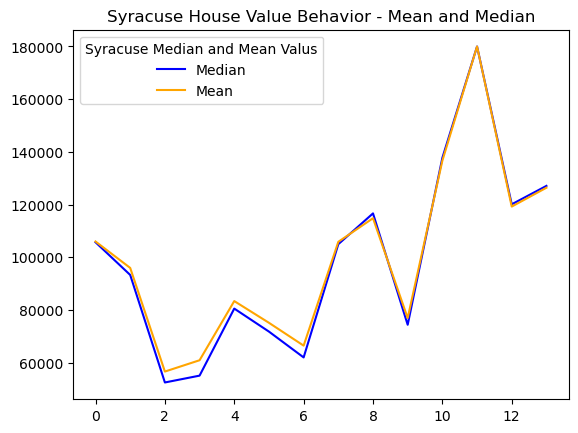

In [52]:
# Visualize 

plt.plot(syracuse_aggregated_zip['median'], label='Median', color='blue')
plt.plot(syracuse_aggregated_zip['mean'], label='Mean', color='orange')
plt.title('Syracuse House Value Behavior - Mean and Median')
plt.legend(title='Syracuse Median and Mean Valus')

In [89]:

# Filter for the specific zip code
zip_code_data = syracuse_data[syracuse_data['RegionName'] == 13215]  # Top Performing Syracuse zip code
#print(zip_code_data)

# Set 'Date' as the index
zip_code_data = zip_code_data.set_index('Date')

#print(zip_code_data)
# Split data: Training (1997-2017)
start_date = datetime(1997, 1, 1)
end_date = datetime(2017, 12, 31)
train_data = zip_code_data[start_date:end_date]
# print(train_data)

# Ensure 'train_data' only contains the 'MedianHousingValue' series
train_data_series = zip_code_data['MedianHousingValue']

train_data_series = train_data_series.asfreq('M') # set the frequency on how you want to train. 


# Verify 'train_data_series' is a Pandas Series with datetime index
#print(train_data_series.head())
#print(train_data_series.index)

# Fit ARIMA model using the series

model = ARIMA(train_data_series, order=(5,1,2))
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# Forecast for the next 12 month starting in 2024
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months
print(forecast)

2024-02-29    319629.117880
2024-03-31    320246.980528
2024-04-30    320864.239186
2024-05-31    321480.894443
2024-06-30    322096.946889
2024-07-31    322712.397115
2024-08-31    323327.245707
2024-09-30    323941.493256
2024-10-31    324555.140347
2024-11-30    325168.187569
2024-12-31    325780.635507
2025-01-31    326392.484747
Freq: M, Name: predicted_mean, dtype: float64


In [72]:
# Check if the DataFrame is empty
if zip_code_data_long.empty:
    print("DataFrame is empty. Check filtering criteria.")
else:
    print("DataFrame contains data.")

# Check DataFrame structure
print(zip_code_data_long.info())


DataFrame contains data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  2 non-null      int64  
 1   Date        2 non-null      object 
 2   median      2 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes
None


In [53]:
# Read in new data to help explain syracuse behavior
crimeFilepath = "/Users/timtieng/Library/CloudStorage/OneDrive-Personal/Desktop/Masters in Applied Data Science/IST-718 Big Data Analytics/Labs/Lab 2/SyracuseCrimeData2022.csv"
crimeRAW = pd.read_csv(crimeFilepath)

syracuseCrime = pd.DataFrame(crimeRAW)
syracuseCrime

,DATEEND,TIMESTART,TIMEEND,ADDRESS,CODE_DEFINED,Arrest,LarcenyCode,ObjectID
0,2022/12/31 00:00:00+00,0432,432,1 DESTINY USA DR,BURGLARY,NaN,From Building,126006
1,2022/12/31 00:00:00+00,2101,2101,100 HUNT AV,AGGRAVATED ASSAULT,Yes,NaN,126007
2,2022/12/31 00:00:00+00,1203,1203,1900 ERIE BLVD W,AGGRAVATED ASSAULT,Yes,NaN,126008
3,2022/12/31 00:00:00+00,1743,1743,200 WESTMORELAND AV,MV THEFT,NaN,Motor Vehicle,126009
4,2022/12/31 00:00:00+00,1840,1840,4700 ONONDAGA BLVD,LARCENY,NaN,From Building,126010
...,...,...,...,...,...,...,...,...
5655,2022/01/01 00:00:00+00,2250,2304,500 OSWEGO ST,MV THEFT,NaN,Motor Vehicle,131661
5656,2022/01/01 00:00:00+00,1705,1705,500 STAFFORD AV,BURGLARY,NaN,NaN,131662
5657,2022/01/01 00:00:00+00,1200,1200,600 BUTTERNUT ST,LARCENY,Yes,Shoplifting,131663
5658,2022/01/01 00:00:00+00,1803,1803,700 S CROUSE AV,LARCENY,NaN,Of Bicycle,131664


In [54]:
syracuseCrime.dtypes

DATEEND         object
TIMESTART       object
TIMEEND          int64
ADDRESS         object
CODE_DEFINED    object
Arrest          object
LarcenyCode     object
ObjectID         int64
dtype: object

In [55]:
syracuseCrime['Arrest'] = syracuseCrime['Arrest'].fillna('Unknown')
syracuseCrime['LarcenyCode'] = syracuseCrime['LarcenyCode'].fillna('Unknown')

syracuseCrime

,DATEEND,TIMESTART,TIMEEND,ADDRESS,CODE_DEFINED,Arrest,LarcenyCode,ObjectID
0,2022/12/31 00:00:00+00,0432,432,1 DESTINY USA DR,BURGLARY,Unknown,From Building,126006
1,2022/12/31 00:00:00+00,2101,2101,100 HUNT AV,AGGRAVATED ASSAULT,Yes,Unknown,126007
2,2022/12/31 00:00:00+00,1203,1203,1900 ERIE BLVD W,AGGRAVATED ASSAULT,Yes,Unknown,126008
3,2022/12/31 00:00:00+00,1743,1743,200 WESTMORELAND AV,MV THEFT,Unknown,Motor Vehicle,126009
4,2022/12/31 00:00:00+00,1840,1840,4700 ONONDAGA BLVD,LARCENY,Unknown,From Building,126010
...,...,...,...,...,...,...,...,...
5655,2022/01/01 00:00:00+00,2250,2304,500 OSWEGO ST,MV THEFT,Unknown,Motor Vehicle,131661
5656,2022/01/01 00:00:00+00,1705,1705,500 STAFFORD AV,BURGLARY,Unknown,Unknown,131662
5657,2022/01/01 00:00:00+00,1200,1200,600 BUTTERNUT ST,LARCENY,Yes,Shoplifting,131663
5658,2022/01/01 00:00:00+00,1803,1803,700 S CROUSE AV,LARCENY,Unknown,Of Bicycle,131664


In [56]:
# Unique Code_Defined
unique_crime_code = syracuseCrime['CODE_DEFINED'].unique()
unique_crime_code

array(['BURGLARY', 'AGGRAVATED ASSAULT', 'MV THEFT', 'LARCENY', 'ROBBERY',
       'MURDER'], dtype=object)

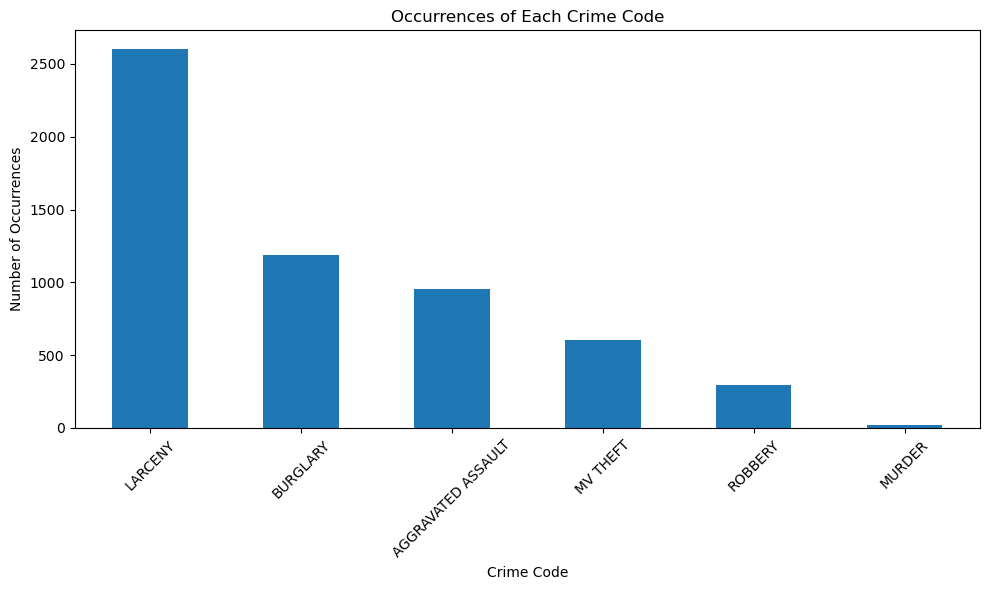

In [57]:
# Count the occurrences of each 'CODE_DEFINED'
code_counts = syracuseCrime['CODE_DEFINED'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
code_counts.plot(kind='bar')
plt.title('Occurrences of Each Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.tight_layout()
plt.show()

In [58]:
# Unique LarcenyCodes
unique_larceny_codes = syracuseCrime['LarcenyCode'].unique()
unique_larceny_codes

array(['From Building', 'Unknown', 'Motor Vehicle', 'Shoplifting',
       'Of Bicycle', 'From Mailbox', 'All Other', 'From Motor Vehicle',
       'Pocket Picking', 'Of MV Parts/Accessories', 'Purse Snatch',
       'From Coin Operated Machine/Device'], dtype=object)

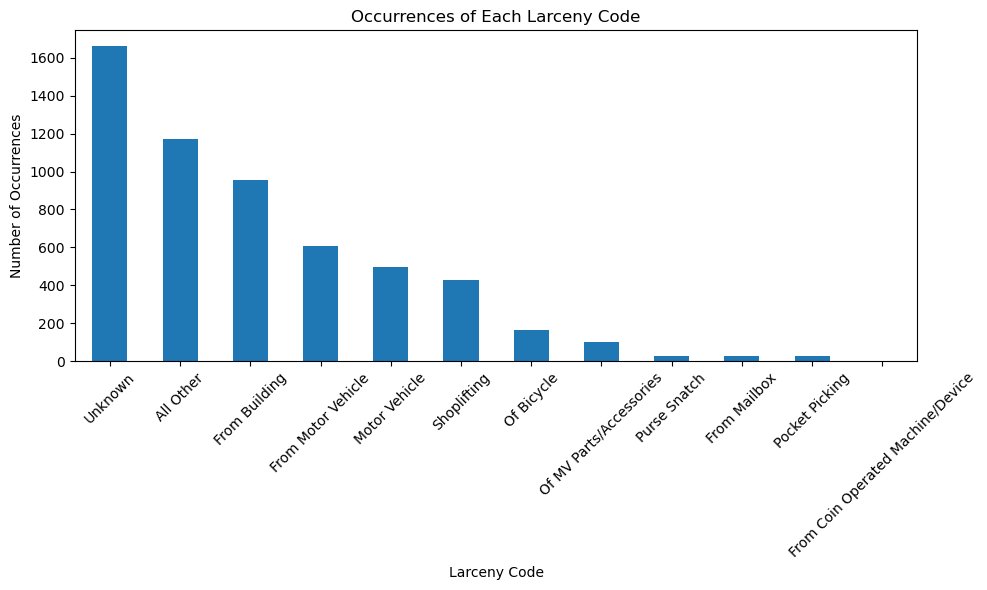

In [59]:
# Count the occurrences of each 'CODE_DEFINED'
code_counts = syracuseCrime['LarcenyCode'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
code_counts.plot(kind='bar')
plt.title('Occurrences of Each Larceny Code')
plt.xlabel('Larceny Code')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.tight_layout()
plt.show()

/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_6455/622321048.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syracuseCrime['Hour'] = syracuseCrime['TIMESTART'].dt.hour


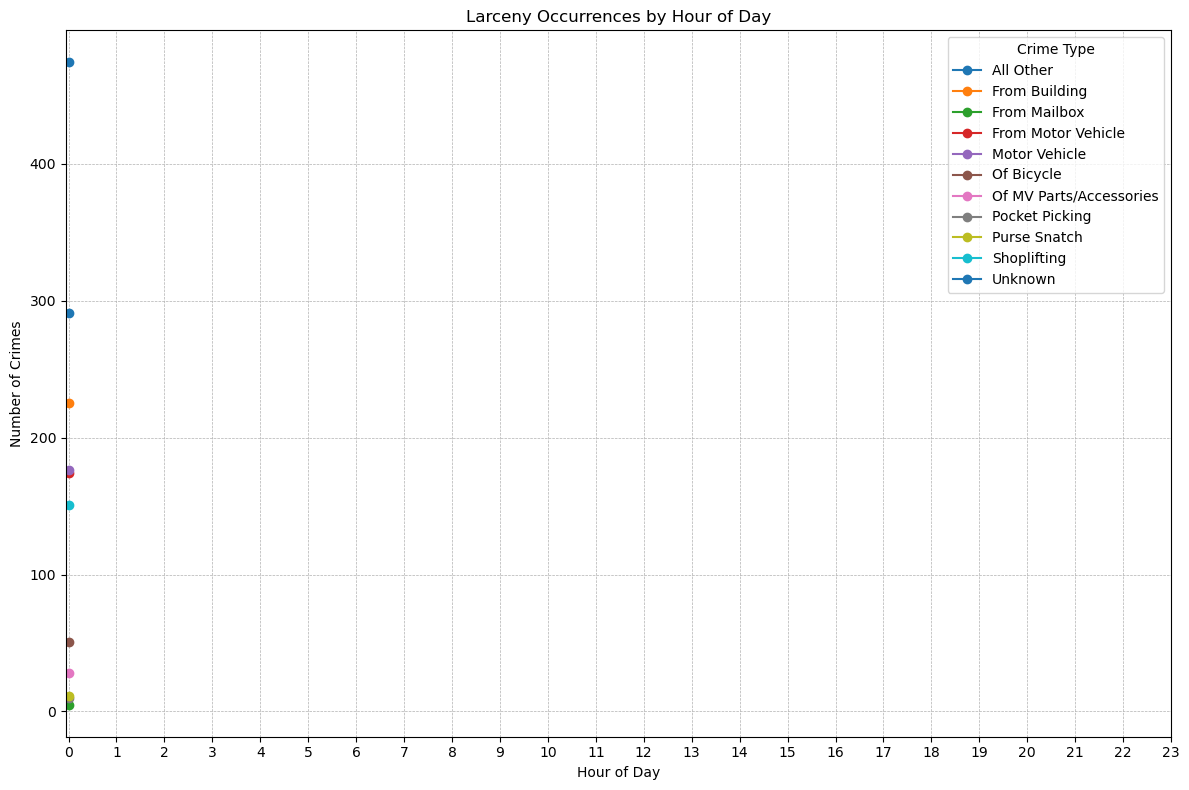

In [60]:
# Safe conversion to datetime with error handling
def safe_convert_to_datetime(column, errors='coerce'):
    return pd.to_datetime(column, errors=errors)

# Apply safe conversion, invalid dates become NaT
syracuseCrime['TIMESTART'] = safe_convert_to_datetime(syracuseCrime['TIMESTART'])

# Filter out rows where 'TIMESTART' is NaT (not a time)
syracuseCrime = syracuseCrime.dropna(subset=['TIMESTART'])

# Now that 'TIMESTART' is safely converted, extract the hour
syracuseCrime['Hour'] = syracuseCrime['TIMESTART'].dt.hour

# Group data by 'CODE_DEFINED' and 'Hour', then count occurrences
crime_by_hour = syracuseCrime.groupby(['LarcenyCode', 'Hour']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
for crime_type in crime_by_hour.index:
    plt.plot(crime_by_hour.columns, crime_by_hour.loc[crime_type], marker='o', label=crime_type)

plt.title('Larceny Occurrences by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))  # Hour markers
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()
